In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# Load dataset
data = load_breast_cancer()

# Separate features and target
X = data.data
y = data.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the scaled data
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Concatenate PCA components with target variable
df_final = pd.concat([df_pca, pd.DataFrame(data=y, columns=['target'])], axis=1)

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



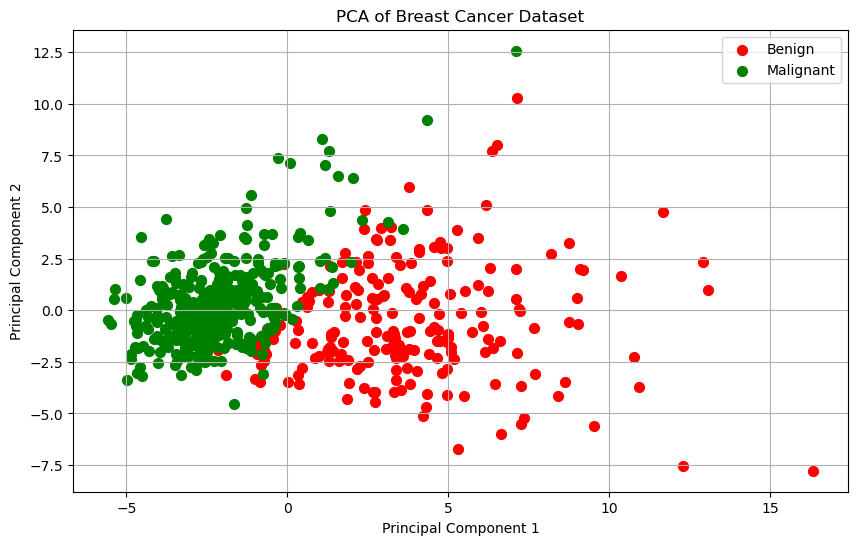

In [9]:
# Scatter plot of the PCA components
plt.figure(figsize=(10, 6))
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = df_final['target'] == target
    plt.scatter(df_final.loc[indicesToKeep, 'PC1'],
                df_final.loc[indicesToKeep, 'PC2'],
                c=color, s=50)
plt.legend(['Benign', 'Malignant'], loc='best')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.grid()
plt.show()